<h3 style='color:purple'>Exercise for k means tutorial</h3>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [3]:
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [39]:
print(set(iris.target))
iris.target_names


{0, 1, 2}


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df = df[['petal length (cm)', 'petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


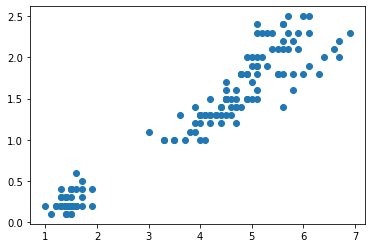

In [16]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [21]:
km = KMeans(n_clusters=3,n_init=5)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
df['cluster'] = y_predicted
df.head()

C:\Users\Ivana\AppData\Local\Temp\ipykernel_14732\868506453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_predicted


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [25]:
df.cluster.value_counts()

2    52
1    50
0    48
Name: cluster, dtype: int64

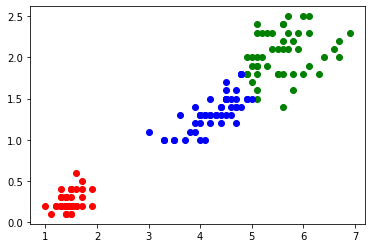

In [26]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color ='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color ='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color ='blue')



In [28]:
k_rng = range(1,10)

sse = []

for k in k_rng:
    km = KMeans(n_clusters=k, n_init=2)
    km.fit(df)
    sse.append(km.inertia_)


Text(0, 0.5, 'SSE: Sum of squared error ')

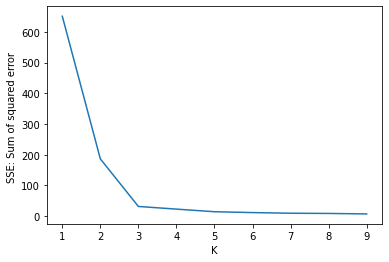

In [30]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('SSE: Sum of squared error')